In [4]:
#기상현상에 따른 태양광 발전량 예측 
# 0.16145
!pip uninstall --y kaggle
!pip install --upgrade pip
!pip  install kaggle==1.5.6

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle -v

Uninstalling kaggle-1.5.8:
  Successfully uninstalled kaggle-1.5.8
     |████████████████████████████████| 1.5MB 11.1MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 5.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=1bbd488dcb320dd7be78919d2d9a881ee7089fd05dc3c3dabc531ff654e42ed7
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Kaggle API 1.5.6


In [5]:
!kaggle competitions download -c solarenergy-meteorologicalphenomenon2
!unzip solarenergy-meteorologicalphenomenon2.zip

  0% 0.00/6.51k [00:00<?, ?B/s]
100% 6.51k/6.51k [00:00<00:00, 6.75MB/s]
Archive:  solarenergy-meteorologicalphenomenon2.zip
  inflating: Solar_SubmitForm_2.csv  
  inflating: Solar_TestData_2.csv    
  inflating: Solar_TrainData_3.csv   


In [28]:
import seaborn as sns 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


df_train = pd.read_csv('Solar_TrainData_3.csv',header=None,skiprows=1,usecols=range(0,9))
df_test  = pd.read_csv('Solar_TestData_2.csv',header=None,skiprows=1,usecols=range(0,8))
print(df_train.head(10))
print(df_test.head(10))

            0    1    2    3      4    5     6    7      8
0  2018-01-01  0.9  0.0  1.5  0.479  8.4  7.13  0.0  1.229
1  2018-01-02  0.7  0.0  0.7  0.569  8.1  6.70  0.0  1.034
2  2018-01-03  2.0  0.0  1.5  0.265  8.6  7.35  0.0  1.193
3  2018-01-04  1.4  0.0  1.0  0.321  4.0  4.79  0.0  0.859
4  2018-01-05  2.4  0.0  1.3  0.379  7.1  6.54  0.0  1.197
5  2018-01-06 -0.3  0.0  0.8  0.523  8.5  7.64  0.0  1.268
6  2018-01-07 -0.3  0.9  0.5  0.619  1.0  2.81  0.0  0.419
7  2018-01-08  3.2  1.5  1.1  0.814  0.0  1.23  0.0  0.231
8  2018-01-09  1.8  0.0  2.6  0.450  7.7  6.81  0.0  0.685
9  2018-01-10 -1.7  0.5  2.3  0.573  4.3  4.31  0.0  0.640
            0     1     2    3      4     5      6    7
0  2018-01-11  -5.4   0.0  1.5  0.465   8.7   7.78  0.0
1  2018-02-16   3.4   0.0  0.8  0.309   5.2   6.63  0.0
2  2018-03-04   9.4  13.1  0.8  0.859   0.0   2.40  0.0
3  2018-03-28  13.4   0.0  1.2  0.611  10.7  13.74  0.0
4  2018-04-27  16.1   0.0  1.1  0.583  11.1  24.00  0.0
5  2018-05-11  

In [29]:
X = df_train.iloc[:,1:-1]
y = df_train.iloc[:,[-1]]
test_x = df_test.iloc[:,1:]

print(X.shape)
print(y.shape)
print(test_x.shape)

(350, 7)
(350, 1)
(16, 7)


In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state=42, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 7)
(140, 7)
(210, 1)
(140, 1)


In [45]:
from sklearn.neighbors import KNeighborsRegressor


#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsRegressor(n_neighbors=k,weights='distance',p=2)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

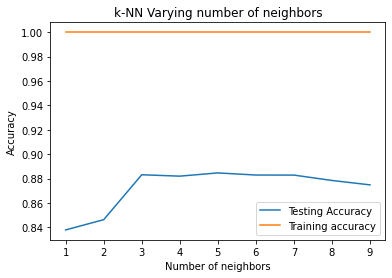

In [46]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [39]:
knn = KNeighborsRegressor(n_neighbors=3,weights='distance')
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')

In [40]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test) #모델을 적용한 test data dml y값 예측치 
print('MisS training samples : %d' %(y_train!=y_train_pred).sum())
# 오분류 데이터 갯수 확인 
print('MisS test samples : %d' %(y_test!=y_test_pred).sum())

MisS training samples : 0
MisS test samples : 140


In [41]:
y_pred = knn.predict(test_x)
y_pred


array([[1.32860386],
       [0.9961068 ],
       [0.34048758],
       [1.71387441],
       [2.01704645],
       [2.04104956],
       [1.55939253],
       [0.46112034],
       [1.84262385],
       [1.46478972],
       [0.57983794],
       [0.33979017],
       [1.645     ],
       [0.95586097],
       [1.17963038],
       [0.57146538]])

In [10]:
submit = pd.read_csv('Solar_SubmitForm_2.csv')
submit

,YYYY/MM/DD,Predict
0,0000-00-00,NaN
1,0000-00-00,NaN
2,0000-00-00,NaN
3,0000-00-00,NaN
4,0000-00-00,NaN
5,0000-00-00,NaN
6,0000-00-00,NaN
7,0000-00-00,NaN
8,0000-00-00,NaN
9,0000-00-00,NaN


In [42]:
MAKE = pd.read_csv('Solar_TestData_2.csv', header = None, skiprows= 1)

for i in range(len(y_pred)):
  submit['Predict'][i] = y_pred[i].item()

submit['YYYY/MM/DD'] = MAKE[0]
submit

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,YYYY/MM/DD,Predict
0,2018-01-11,1.328604
1,2018-02-16,0.996107
2,2018-03-04,0.340488
3,2018-03-28,1.713874
4,2018-04-27,2.017046
5,2018-05-11,2.041050
6,2018-05-30,1.559393
7,2018-06-12,0.461120
8,2018-06-25,1.842624
9,2018-07-28,1.464790


In [43]:
submit.to_csv('result.csv', mode='w', index = False)

In [44]:
! kaggle competitions submit -c solarenergy-meteorologicalphenomenon2 -f result.csv -m "14010974 이기택 LATE"

100% 484/484 [00:00<00:00, 1.14kB/s]
Successfully submitted to SejongAI.텀프로젝트.[기상현상에 따른 태양광발전량 예측]